# Calibration of a diffraction setup using `Jupyter` notebooks
This notebook presents a very simple GUI for doing the calibration of diffraction setup within the Jupyter-lab environment with `Matplotlib` and `Ipywidgets`.

Despite this is in the `cookbook` section, this **tutorial** requires advanced Python programming knowledge and some good understanding of `PyFAI`. 

The basic idea is to port, more or less directly, the `pyFAI-calib` interface which was done with matplotlib into the Jupyter notebook. 

The PeakPicker widget has been refactored and the Calibration tool adapted for the notebook usage.

Most credits go *Philipp Hans* for the adaptation of the origin PeakPicker class to Jupyter.

In [1]:
%matplotlib widget

import pyFAI
import pyFAI.test.utilstest
import fabio
from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
from pyFAI.gui.jupyter.calib import Calibration

print(f"PyFAI version {pyFAI.version}")

PyFAI version 0.21.0-dev3


In [2]:
# Some parameters like the wavelength, the calibrant and the diffraction image (downloaded from internet)
wavelength = 1e-10
pilatus = pyFAI.detector_factory("Pilatus1M")
AgBh = pyFAI.calibrant.CALIBRANT_FACTORY("AgBh")
AgBh.wavelength = wavelength

#load some test data
img = fabio.open(pyFAI.test.utilstest.UtilsTest.getimage("Pilatus1M.edf")).data

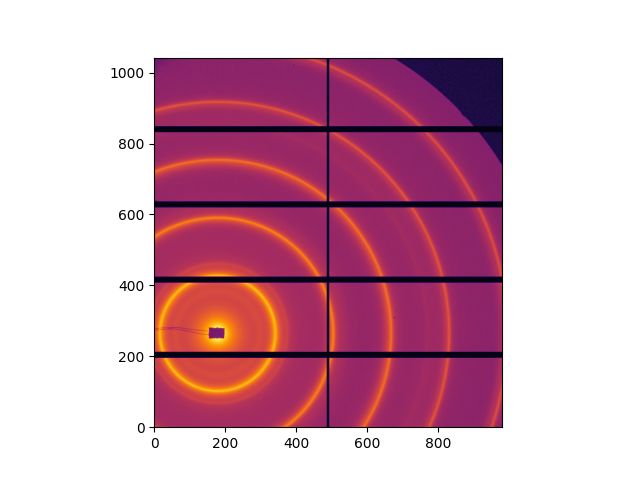

In [3]:
#Simple display of the image:
_ = jupyter.display(img)

In [4]:
calib = Calibration(img, calibrant=AgBh, wavelength=wavelength, detector=pilatus)
# This is the calibration widget: 
# set the ring number (0-based value), below the plot then pick the ring with a right mouse button. 
# Pick at least two rings
# Finally click refine"wavelength" to get the geometry.

In [5]:
#This is the calibrated geometry:
gr = calib.geoRef
print(gr)
print(f"Fixed parameters: {calib.fixed}")
print(f"Cost function = {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.000000e-10m
SampleDetDist= 1.634041e+00m	PONI= 3.858028e-02, 8.104523e-03m	rot1=-0.013952  rot2= 0.004193  rot3= 0.000000 rad
DirectBeamDist= 1634.214mm	Center: x=179.673, y=264.141 pix	Tilt=0.835 deg  tiltPlanRotation= 16.727 deg
Fixed parameters: ['wavelength', 'rot3']
Cost function = 1.647169916807231e-07


In [6]:
# Geometry refinement with some (different) constrains:

gr.dist = 1.6
gr.refine3(fix=["dist"])
print(gr)
print(f"Cost function = {gr.chi2()}")

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.021171e-10m
SampleDetDist= 1.600000e+00m	PONI= 3.822426e-02, 7.759918e-03m	rot1=-0.014463  rot2= 0.004504  rot3= 0.000000 rad
DirectBeamDist= 1600.184mm	Center: x=179.665, y=264.137 pix	Tilt=0.868 deg  tiltPlanRotation= 17.298 deg
Cost function = 1.753639180275635e-07


In [7]:
gr.save("jupyter.poni")
gr.get_config()

OrderedDict([('poni_version', 2),
             ('detector', 'Pilatus1M'),
             ('detector_config', OrderedDict()),
             ('dist', 1.6),
             ('poni1', 0.03822426467261788),
             ('poni2', 0.007759918250884357),
             ('rot1', -0.014463067533266346),
             ('rot2', 0.004504056497897978),
             ('rot3', 5.0100104332423863e-11),
             ('wavelength', 1.0211712791640921e-10)])

In [8]:
ai = pyFAI.load(gr)
ai

Detector Pilatus 1M	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 1.021171e-10m
SampleDetDist= 1.600000e+00m	PONI= 3.822426e-02, 7.759918e-03m	rot1=-0.014463  rot2= 0.004504  rot3= 0.000000 rad
DirectBeamDist= 1600.184mm	Center: x=179.665, y=264.137 pix	Tilt=0.868 deg  tiltPlanRotation= 17.298 deg

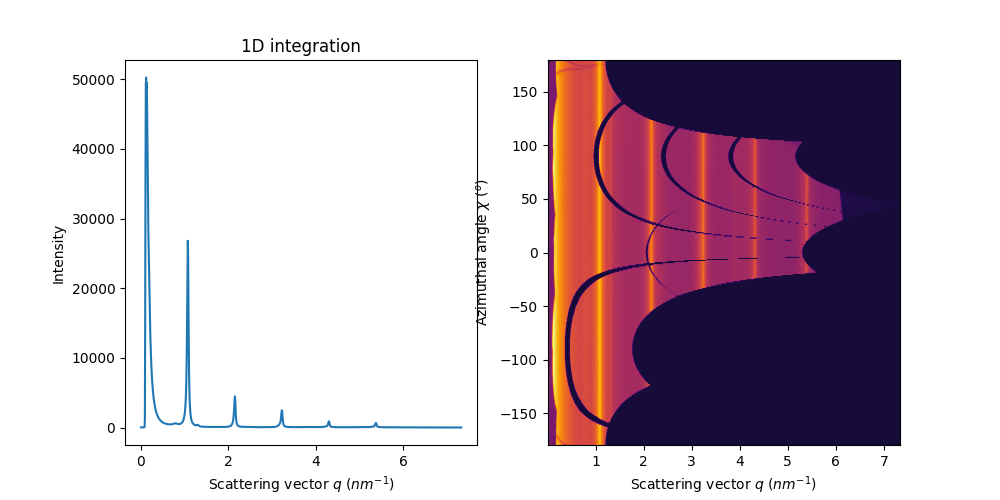

In [9]:
fig, ax = subplots(1, 2, figsize=(10, 5))
jupyter.plot1d(ai.integrate1d(img, 1000), ax=ax[0])
jupyter.plot2d(ai.integrate2d(img, 1000), ax=ax[1])
pass

## Conclusion

This short notebook shows how to interact with a calibration image to pick some control-point from the Debye-Scherrer ring and to perform the calibration of the experimental setup.